## Курсовой проект: рекламный сервер
### Финальный отчёт
## Розенвальд Михаль
### 141

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, log, e
import os.path
import parser
import errno


### Класс функций полином. На примере полиномов будем рассматривать поведение гладких функций. 

In [2]:
class Polynomial(object):
    def __init__(self, coefficients):
        self.coeff = coefficients
        while(len(self.coeff) < 7):
            self.coeff.append(0)

    def __call__(self, x):
        # Return polinomial value
        s = 0
        for i in range(len(self.coeff)):
            s += int(self.coeff[i])*x**i
        return s

    def PolyPrint(self):
        if (len(self.coeff) == 0):
            return ('Empty function')
        poly_string = ''
        for i in range(len(self.coeff) - 1, 0, -1):
            if (self.coeff[i] != 0):
                poly_string += str(self.coeff[i]) + 'x^' + str(i) +' + '
        poly_string += str(self.coeff[0])

        return (poly_string)

    def __mul__(self, num):
        result_coeff = list(map(int, self.coeff[:])) # copy!
        for i in range(len(self.coeff)):
            result_coeff[i] *= num
        return Polynomial(result_coeff)


    def __add__(self, other):
        # Return self + other as Polynomial object
        # Start with the longest list and add in the other
        if len(self.coeff) > len(other.coeff):
            result_coeff = list(map(int, self.coeff[:]))  # copy
            for i in range(len(other.coeff)):
                result_coeff[i] += int(other.coeff[i])
        else:
            result_coeff = list(map(int, other.coeff[:])) # copy
            for i in range(len(self.coeff)):
                result_coeff[i] += int(self.coeff[i])
        return Polynomial(result_coeff)
    
    def differ_max(self):
        # only for polinoms with degree <= 2
        x_max = - float(self.coeff[1]) / (2*self.coeff[0])
        return self.coeff[1] + 2 * self.coeff[1] * x_max
    
    def lambda_func(self):
        # only for polinoms with degree <= 2
        #if (self.coeff.size() = 2) { self.coeff}
        return lambda x: self.coeff[0] + x * self.coeff[1] + x * x * self.coeff[2] + x * x * x * self.coeff[3] + (x**4)*self.coeff[4] + (x**5)*self.coeff[5]
    
    def lambda_func_ans(self, x):
        # only for polinoms with degree <= 2
        return self.coeff[0] + x * self.coeff[1]


In [3]:
poly = Polynomial([1,2,3,4,5,6])
print poly.PolyPrint()
print 'poly(0) = ', poly(0)
print 'poly(1) = ',poly(1)

#Interpolate_compare(poly, -10, 10, 10, True)

6x^5 + 5x^4 + 4x^3 + 3x^2 + 2x^1 + 1
poly(0) =  1
poly(1) =  21


In [4]:

class Oscillation_sin(object):
    # f(x) = x * sin(x)
    def __init__(self):
        self.coeff = 1
        
    def __call__(self, x):
        # Return Oscillation_sin value
        s = x * np.sin(x)
        return s
    
    def OscPrint(self):
        osc_string = "x * sin(x)"
        return (osc_string)
    
    def differ_max(self):
        return 1.819  # when x in [-5, 5]
    
    def lambda_func(self):
        return lambda x: x * np.sin(x)



In [5]:
osc = Oscillation_sin()
print osc.OscPrint()
print 'osc(0) = ', osc(0)
print 'osc(1) = ', osc(1)

x * sin(x)
osc(0) =  0.0
osc(1) =  0.841470984808


Разрывные функции будем задавать кусочно, как два разлиных полинома, заданных на интервалах poly_a на (-inf; x_0) и poly_b на [x_0; inf).

$f(x) = \begin{cases} a_1 x + a_0 & x < x_0 \\ b_1 x + b_0 & x \geq x_0 \end{cases}$

In [6]:
class Discontinuous(object):
    # poly_a with coeffs (a_1, a_0) when x in  (-inf; x_0), esle - poly_b with coeffs (b_1, b_0)
    def __init__(self, coefficients_a, coefficients_b, x_0):
        self.coeff_a = coefficients_a
        self.coeff_b = coefficients_b
        self.poly_a = Polynomial(coefficients_a)
        self.poly_b = Polynomial(coefficients_b)
        self.x_0 = x_0

    def __call__(self, x):
        # Return polinomial value
        if (x < self.x_0):
            s = self.poly_a(x)
        else:
            s = self.poly_b(x)
        return s
    
    def DiscontinPrint(self):
        disc_string = self.poly_a.PolyPrint() + " , x < " + str(self.x_0) + '\n' + self.poly_b.PolyPrint() + " , x > " + str(self.x_0) 
        return (disc_string)
    
    def differ_max(self):
        return max( self.poly_a.differ_max(), self.poly_b.differ_max())
    
    def lambda_func(self):
        return lambda x: (self.poly_a.coeff[0] + x * self.poly_a.coeff[0]) if x < self.x_0 else (self.poly_b.coeff[0] + x * self.poly_b.coeff[0])
    

In [7]:
disc = Discontinuous([1, 2], [2, 3], 0)
print 'disc function : \n', disc.DiscontinPrint()
print 'disc(0) = ', disc(0)
print 'disc(-0.1) = ', disc(-0.1)
print 'disc(0.1) = ', disc(0.1)

disc function : 
2x^1 + 1 , x < 0
3x^1 + 2 , x > 0
disc(0) =  2
disc(-0.1) =  0.8
disc(0.1) =  2.3


## Введем классы для функций системы

In [25]:
class Rho_func:
    def __init__(self, expression):
        self.formula = parser.expr(expression).compile()

    def __call__(self, *args):
        w = args[0]
        return eval(self.formula)
    
class Sz_func:
    def __init__(self, expression):
        self.formula = parser.expr(expression).compile()

    def __call__(self, *args):
        t = args[0]
        return eval(self.formula)
    
    
class F_func:
    def __init__(self, expression, beta, z_func, s_func):
        self.formula = parser.expr(expression).compile()
        self.beta = beta
        self.z = z_func
        self.s = s_func
        
    def __call__(self, t, x):
        z = self.z(t)
        S = self.s(t)
        beta = self.beta
        return eval(self.formula)


class Tabulated_func:
    def __init__(self, tabulated_values, grid):
        self.values = tabulated_values
        self.grid = grid

    def __getitem__(self, i):
        return self.values[i]


class Interpolation_func:
    def __init__(self, splines, grid):
        self.grid = grid
        self.splines = splines

    def __call__(self, x):
        if (x < self.grid[0]) or (x > self.grid[len(self.grid) - 1]):
            print (x)
            raise RuntimeError("x is not in domain of interpolation")
        for i in range(len(self.grid) - 1):
            if (x >= self.grid[i]) & (x <= self.grid[i+1]):
                break
        return self.splines[i](x)

class Polinomial:
    def __init__(self, degree, coefs, x0):
        self.degree = degree
        self.coefs = coefs
        self.x0 = x0
        if degree + 1 != len(coefs):
            raise RuntimeError("Polinom is initialised incorrectly")

    def __call__(self, x):
        res = 0
        for i in range(self.degree + 1):
            res += self.coefs[i] * (x - self.x0)**i
        return res

class Solution:
    
    def __init__(self, y_tab, x_tab, S_tab, x_0, y_0, beta, C1, C2, loss):
        self.y_tab = y_tab
        self.x_tab = x_tab
        self.S_tab = S_tab
        self.x_0 = x_0
        self.y_0 = y_0
        self.beta = beta
        self.C1 = C1
        self.C2 = C2
        self.loss = loss

In [26]:
# class FunctionRho:
#     def __init__(self, expression):
#         self.formula = parser.expr(expression).compile()

#     def __call__(self, *args):
#         w = args[0]
#         return eval(self.formula)
    
# class FunctionSz:
#     def __init__(self, expression):
#         self.formula = parser.expr(expression).compile()

#     def __call__(self, *args):
#         t = args[0]
#         return eval(self.formula)
    
    
# class FunctionF:
#     def __init__(self, expression, beta, z_func, s_func):
#         self.formula = parser.expr(expression).compile()
#         self.beta = beta
#         self.z = z_func
#         self.s = s_func
        
#     def __call__(self, t, x):
#         z = self.z(t)
#         S = self.s(t)
#         beta = self.beta
#         return eval(self.formula)


# class TabulatedFunction:
#     def __init__(self, tabulated_values, grid):
#         self.values = tabulated_values
#         self.grid = grid

#     def __getitem__(self, i):
#         return self.values[i]


# class Interpolation:
#     def __init__(self, splines, grid):
#         self.grid = grid
#         self.splines = splines

#     def __call__(self, x):
#         if (x < self.grid[0]) or (x > self.grid[len(self.grid) - 1]):
#             print (x)
#             raise RuntimeError("x is not in domain of interpolation")
#         for i in range(len(self.grid) - 1):
#             if (x >= self.grid[i]) & (x <= self.grid[i+1]):
#                 break
#         return self.splines[i](x)

# class Polinomial:
#     def __init__(self, degree, coefs, x0):
#         self.degree = degree
#         self.coefs = coefs
#         self.x0 = x0
#         if degree + 1 != len(coefs):
#             raise RuntimeError("Polinom is initialised incorrectly")

#     def __call__(self, x):
#         res = 0
#         for i in range(self.degree + 1):
#             res += self.coefs[i] * (x - self.x0)**i
#         return res

# Модули
## Табулирование


In [27]:
# табулированная функция
def tabulate(function, grid):
    values = np.array([function(x) for x in grid])
    return Tabulated_func(values, grid)


# def Tabulate(func, x_steps):
#     values = []
#     for i in range(len(x_steps)):
#         values.append(func(x_steps[i]))

#     tabu_df = pd.DataFrame(columns=('x', 'val'))
#     tabu_df['x'] = x_steps
#     tabu_df['val'] = values
#     return tabu_df

# Интегрирование методом треугольников

In [28]:
# значение интеграл
def integrate(func, nnodes, interval):
    xnet = np.linspace(interval[0], interval[1], nnodes)
    I = 0
    for i in range(nnodes - 1):
        I += (float(xnet[i + 1] - xnet[i]) / 6) * float(func(xnet[i]) + 4 * func(0.5 * (xnet[i] + xnet[i + 1])) + func(xnet[i + 1]))
    return I

def integrate_rectangle(func, a, b, steps_number):
    x_steps = np.linspace(a, b, num=steps_number)
    func_tabu_df = Tabulate(func, x_steps)
    I = 0
    for i in range(steps_number - 1):
        I += func_tabu_df['val'][i] * (func_tabu_df['x'][i + 1] - func_tabu_df['x'][i])
    return I


# СЛУ

In [29]:
# Корни СЛУ
# def kramer(A, F):
#     det = np.linalg.det(A)
#     if not det:
#         raise RuntimeError("Determinant equals to 0.")
#     roots = []
#     for x in range(A.shape[1]):
#         tmp = A.copy()
#         tmp[:, x] = F
#         roots.append(float(np.linalg.det(tmp)) / det)
#     return roots


def Det(A):
    return np.linalg.det(A)
def kramer(A, b):
    det = Det(A)
    
    A_size = A.shape[1]
    x = [0]*A_size

    if (det != 0):
        for i in range(A_size):
            A_i = A.copy()
            A_i[:, i] = b
            det_i = float(Det(A_i))
            x_i = det_i / det
            x[i] = x_i
        return x
    
    return "det == 0, NO SOLUTION"

#  Интерполяции с помощью кубических сплайнов

In [30]:
# интерполяция - callable object
def interpolate(tabulated_function):

    grid = tabulated_function.grid
    N = len(grid) - 2
    matrix = np.zeros((N, N))
    values = np.zeros(N)
    for i in range(1, N+1):

        h_0 = grid[i] - grid[i-1]
        h_1 = grid[i+1] - grid[i]

        if i != 1:
            matrix[i-1, i-2] = h_0
        if i != N:
            matrix[i-1, i] = h_1

        matrix[i-1, i-1] = 2*(h_0 + h_1)
        delta_1 = float(tabulated_function[i+1] - tabulated_function[i])
        delta_0 = float(tabulated_function[i] - tabulated_function[i-1])
        values[i-1] = 6 * (delta_1 / h_1 - delta_0 / h_0)
    derivatives_2 = kramer(matrix, values)

    splines = []
    for i in range(N+1):
        der2_0 = float(derivatives_2[i-1] if i != 0 else 0)
        der2_1 = float(derivatives_2[i] if i != N else 0)

        h = grid[i+1] - grid[i]
        der3 = (der2_1 - der2_0) / h

        f0 = float(tabulated_function[i])
        f1 = float(tabulated_function[i+1])

        der1 = (f1 - f0) / h - der2_1 * h / 6 - der2_0 * h / 3

        p = Polinomial(3, [f0, der1, der2_0 / 2, der3 / 6], grid[i])
        splines.append(p)
    return Interpolation_func(splines, tabulated_function.grid)


In [31]:
# def interpolate(f_tabu):
#     x_steps = f_tabu.grid
#     #f_tabu = tabulated_function
#     x_dif = [x_steps[i] - x_steps[i-1] for i in range(1, len(x_steps))]
#     b = np.array([(f_tabu[i+1]-f_tabu[i])/x_dif[i] - (f_tabu[i]-f_tabu[i-1])/x_dif[i-1] for i in range(1, len(x_steps) - 1)])

#     n = len(x_steps) - 1
#     A = np.zeros((n - 1, n - 1))
#     for i in range(n-2):
#         A[i][i] = (x_dif[i] + x_dif[i+1]) / 3
#         A[i+1][i] = x_dif[i+1] / 6
#         A[i][i+1] = x_dif[i+1] / 6
#     A[n-2][n-2] = (x_dif[n-2]+x_dif[n-1]) / 3
    
#     x_kram = [0] +  kramer(A, b) + [0]
#     d_1 = [(f_tabu[i + 1] - f_tabu[i])/x_dif[i] - x_dif[i]*(x_kram[i+1]-x_kram[i])/6 for i in range(n)]
#     d_2 = [f_tabu[i] - x_kram[i]*x_dif[i]*x_dif[i]/6 - d_1[i]*x_steps[i] for i in range(n)]
#     splines = []
#     sp_coef_cur = [0,0,0,0]
#     for i in range(n):
#         sp_coef_cur[0] = 1/(6*x_dif[i])*(x_kram[i+1] - x_kram[i])
#         sp_coef_cur[1] = 1/(2*x_dif[i])*(x_kram[i]*x_steps[i+1] - x_steps[i]*x_kram[i+1])
#         sp_coef_cur[2] = d_1[i] + 1/(6*x_dif[i])*(3*x_steps[i]*x_steps[i]*x_kram[i+1] - 3*x_steps[i+1]*x_steps[i+1]*x_kram[i])
#         sp_coef_cur[3] = d_2[i] + 1/(6*x_dif[i])*(x_kram[i]*pow(x_steps[i + 1],3) - x_kram[i+1]*pow(x_steps[i], 3))
#         x0 = x_steps[i]
#         coef_poli = Polinomial(3, sp_coef_cur, x0)
#         splines.append(coef_poli) 
#         sp_coef_cur = [0,0,0,0]
        
#     return Interpolation_func(splines, x_steps)


In [32]:
def Interpolate_steps_tabu(x_steps, f_tabu):
    x_dif = [x_steps[i] - x_steps[i-1] for i in range(1, len(x_steps))]
    b = np.array([(f_tabu[i+1]-f_tabu[i])/x_dif[i] - (f_tabu[i]-f_tabu[i-1])/x_dif[i-1] for i in range(1, len(x_steps) - 1)])

    n = len(x_steps) - 1
    A = np.zeros((n - 1, n - 1))
    for i in range(n-2):
        A[i][i] = (x_dif[i] + x_dif[i+1]) / 3
        A[i+1][i] = x_dif[i+1] / 6
        A[i][i+1] = x_dif[i+1] / 6
    A[n-2][n-2] = (x_dif[n-2]+x_dif[n-1]) / 3
    
    x_kram = [0] +  Kramer(A, b) + [0]
    d_1 = [(f_tabu[i + 1] - f_tabu[i])/x_dif[i] - x_dif[i]*(x_kram[i+1]-x_kram[i])/6 for i in range(n)]
    d_2 = [f_tabu[i] - x_kram[i]*x_dif[i]*x_dif[i]/6 - d_1[i]*x_steps[i] for i in range(n)]
    splines = []
    sp_coef_cur = [0,0,0,0]
    for i in range(n):
        sp_coef_cur[0] = 1/(6*x_dif[i])*(x_kram[i+1] - x_kram[i])
        sp_coef_cur[1] = 1/(2*x_dif[i])*(x_kram[i]*x_steps[i+1] - x_steps[i]*x_kram[i+1])
        sp_coef_cur[2] = d_1[i] + 1/(6*x_dif[i])*(3*x_steps[i]*x_steps[i]*x_kram[i+1] - 3*x_steps[i+1]*x_steps[i+1]*x_kram[i])
        sp_coef_cur[3] = d_2[i] + 1/(6*x_dif[i])*(x_kram[i]*pow(x_steps[i + 1],3) - x_kram[i+1]*pow(x_steps[i], 3))
        splines.append(sp_coef_cur) 
        sp_coef_cur = [0,0,0,0]
        
    f_tabu_interp = []
    x_steps_all = []
    for i in range(n):
        x_st = np.linspace(x_steps[i], x_steps[i+1], num=163)
        spline = splines[i]
        f = list(map(lambda x: spline[3] + x*spline[2] + x*x*spline[1] + x*x*x*spline[0], x_st))
        x_steps_all += list(x_st)
        f_tabu_interp += f
                                
    return f_tabu_interp, x_steps_all

# Задача Коши

In [33]:
# табулированная x
# табулированная y
def diff_equastions(func1, func2, x_0, y_0, grid):
    x = [x_0,]
    y = [y_0,]
    step = grid[1] - grid[0]
    for i in range(1, len(grid)):
        x_old = x[i - 1]
        y_old = y[i - 1]
        t_old = grid[i - 1]
        x_new = x_old + step * func1(t_old, y_old)
        y_new = y_old + step * func2(t_old, x_old)
        if y_new < 0 or y_new > 1:
            raise RuntimeError("Y must be in [0, 1]. Specify another beta.")
        x.append(x_new)
        y.append(y_new)
    return Tabulated_func(np.array(x), grid), Tabulated_func(np.array(y), grid)


def euler_method_tow_dim (fun_x, x_0, fun_y, y_0, t_0, T, tau):
    t_steps = np.arange(t_0, T, tau)
    x = []
    y = []
    x_prev = x_0
    y_prev = y_0
    t_prev = t_0
    for i in range(len(t_steps)):
        t_prev = t_steps[i]
        x_next = x_prev + tau * fun_x(x_prev, y_prev) # x(t_prev) # fun(t_pred, x_pred)
        y_next = y_prev + tau * fun_y(x_prev, y_prev) # y(t_prev) # fun(t_pred, y_pred)
        x.append(x_next)
        y.append(y_next)
        x_prev = x_next
        y_prev = y_next
    tabu_df = pd.DataFrame(columns=('t', 'x', 'y'))
    tabu_df['t'] = t_steps
    tabu_df['x'] = x
    tabu_df['y'] = y

    return tabu_df

# Дифференцирование 
(Для сплайнов функций полученных при интерполяции)


In [34]:
# интерполяция функции кубическими сплайнами
# интерполяция производной
def derivative_interpolation(interpolation):
    derivative_polinomials = []
    for pol in interpolation.splines:
        new_coefs = []
        for i in range(1, len(pol.coefs)):
            new_coefs.append(i * pol.coefs[i])
        derivative_polinomials.append(Polinomial(pol.degree-1, new_coefs, pol.x0))
    new_interpolation = Interpolation_func(derivative_polinomials, interpolation.grid)
    return new_interpolation

In [35]:
grid = np.linspace(0, 10, 100)
vals = np.sin(grid)
interpol = interpolate(Tabulated_func(vals, grid))

In [36]:
deriv = derivative_interpolation(interpol)
der_values = [deriv(x) for x in grid]

In [48]:
# fig, axis = plt.subplots(ncols=3, nrows=1, figsize=(20,5))

# axis[0].plot(grid, vals)
# axis[0].set_title("sin(x)")

# axis[1].plot(deriv.grid, der_values)
# axis[1].set_title("sin'(x)")

# axis[2].plot(grid, np.cos(grid))
# axis[2].set_title("cos(x)")

# Критерии оценивания

In [49]:
def C1_score(x_interpol, y_interpol, rho, nnodes, tgrid, T):
    integrand_dw = lambda w: w*rho(w)
    intergral_dw = lambda t: integrate(func=integrand_dw, nnodes=nnodes, interval=[y_interpol(t), 1])
    integral_tab = tabulate(intergral_dw, grid=tgrid)
    intergral_interpol = interpolate(tabulated_function=integral_tab)
    x_deriv_interpol = derivative_interpolation(x_interpol)
    integrand_dt = lambda t: x_deriv_interpol(t) * intergral_dw(t)
    integral_dt = integrate(func=integrand_dt, nnodes=nnodes, interval=[0, T])
    C1 = 1 - integral_dt / (x_interpol(T) - x_interpol(0))
    return C1

In [50]:
def C2_score(x_interpol, S, T):
    return abs(x_interpol(T) - S(T)) / S(T)

In [51]:
def Loss(C1_score, C2_score):
    return C1_score + 10*C2_score

# Корректность ввода функций

In [52]:
def verify_rho(rho):
    return 1 == round(integrate(func=rho, nnodes=100, interval=[0, 1]), 1)

def verify_zS(S, z, T):
    z_tab = tabulate(z, grid=([t for t in np.linspace(0, T, 100)]))
    S_tab = tabulate(S, grid=([t for t in np.linspace(0, T, 100)]))
    z_interpol = interpolate(z_tab)
    S_interpol = interpolate(S_tab)
    z_deriv_interpol = derivative_interpolation(z_interpol)
    S_deriv_interpol = derivative_interpolation(S_interpol)
    return compare_derivatives(S_deriv_interpol, z_deriv_interpol)

# Визуализация результатов

In [53]:
# y, x, S_tab, x_0, y_0, f.beta, C1, C2, loss)
def build_res_graphs(solutions):
    fig, axis = plt.subplots(ncols=2, nrows=len(solutions), figsize=(15,5*len(solutions))) # , nrows=len(solutions), figsize=(15,5*len(solutions))
    # fig, axis = plt.subplots(ncols=3, nrows=len(solutions), figsize=(15,5*len(solutions)))
    for i in range(len(solutions)):
        sol = solutions[i]
        axis[0].plot(sol.y_tab.grid, sol.y_tab.values, linewidth=2)
        axis[0].set_title("y(t)", fontsize=14)
        axis[0].set_xlabel("t", fontsize=14)
        axis[0].set_ylabel("y(t)", fontsize=14)
    
        axis[1].plot(sol.x_tab.values, sol.S_tab.values, linewidth=2)
        axis[1].set_title("S(x)", fontsize=14)
        axis[1].set_xlabel("x(t)", fontsize=14)
        axis[1].set_ylabel("S(t)", fontsize=14)

# Запись результатов в файл

In [54]:
def write_to_file(solutions):
    f = open('result.txt', 'w')  # ('outputs/result.txt', 'w')
    res = ''
    for sol in solutions:
        res += '\nbeta = ' + str(sol.beta)
        res += '\nC1 = ' + str(sol.C1)
        res += '\nC2 = ' + str(sol.C2)
        res += '\nloss = ' + str(sol.loss)
        res += '\nx_0 = ' + str(sol.x_0)
        res += '\ny_0 = ' + str(sol.y_0)
        res += '\ny(t):' + str(list(zip(sol.y_tab.grid, sol.y_tab.values)))
        res += '\nx(t):' + str(list(zip(sol.x_tab.grid, sol.x_tab.values)))
    f.write(res)
    f.close()

# Решатель

In [55]:
def solver_logged(is_automatic, rho, z, S, f, y_0, x_0, T):
    nnodes = 100
    tgrid = np.linspace(0, T, nnodes)
    ygrid = np.linspace(0, 1, nnodes)
    S_tab = tabulate(function=S, grid=tgrid)
    z_tab = tabulate(function=z, grid=tgrid)
    z_interpol = interpolate(tabulated_function=z_tab)
    z_derivative_interpol = derivative_interpolation(interpolation=z_interpol)
    integral = lambda y: integrate(func=rho, nnodes=nnodes, interval=[y, 1])
    integral_tab = tabulate(function=integral, grid=ygrid)
    integral_interpol = interpolate(tabulated_function=integral_tab)
    func1 = lambda t, y: z_derivative_interpol(t) * integral_interpol(y)
    log = []
    if is_automatic:
        log.append("Automatic mode started")
        scores = []
        for f_func in f:
            try:
                x, y = diff_equastions(func1, f_func, x_0, y_0, tgrid)
            except:
                continue
            x_interpol = interpolate(tabulated_function=x)
            y_interpol = interpolate(tabulated_function=y)
            C1 = C1_score(x_interpol, y_interpol, rho, nnodes, tgrid, T)
            C2 = C2_score(x_interpol, S, T)
            loss = Loss(C1, C2)
            scores.append(loss)
        scores = np.array(scores)
        if len(scores) == 0:
            log.append("Unfortunatelly, no beta satisfies the requirement: y in [0, 1]")
            return log
        log.append("Best solution:")
        max_score = np.max(scores)
        log.append("Ф(best_beta) = " + str(max_score))
        best_f = f[np.argmax(scores)]
        best_beta = best_f.beta
        log.append("Best beta = " + str(best_beta))
        log.append("")
        log.append("Building solutions for different x0, y0...")
        x0_grid = np.linspace(0, 9, 10)
        y0_grid = np.linspace(0, 0.9, 10)
        solutions = []
        for x_0, y_0 in zip(x0_grid, y0_grid):
            log.append("x0 = " + str(x_0))
            log.append("y0 = " + str(y_0))
            try:
                x, y = diff_equastions(func1, best_f, x_0, y_0, tgrid)
            except:
                log.append("Y not in [0,1]. Try another x0, y0. Continue...")
                log.append("")
                continue
            x_interpol = interpolate(tabulated_function=x)
            y_interpol = interpolate(tabulated_function=y)
            C1 = C1_score(x_interpol, y_interpol, rho, nnodes, tgrid, T)
            C2 = C2_score(x_interpol, S, T)
            loss = Loss(C1, C2)
            log.append("C1(x0, y0) = " + str(C1))
            log.append("C2(x0, y0) = " + str(C2))
            log.append("Ф(x0, y0) = " + str(loss))
            log.append("")
            solutions.append(Solution(y, x, S_tab, x_0, y_0, best_beta, C1, C2, loss))
            build_res_graphs(solutions)
            write_to_file(solutions)
        return log
    else:
        log.append("Manual mode started")
        func1 = lambda t, y: z_derivative_interpol(t) * integral_interpol(y)
        try:
            x, y = diff_equastions(func1, f, x_0, y_0, tgrid)
        except:
            log.append("Y not in [0,1]. Try another beta.")
            return log
        x_interpol = interpolate(tabulated_function=x)
        y_interpol = interpolate(tabulated_function=y)
        C1 = C1_score(x_interpol, y_interpol, rho, nnodes, tgrid, T)
        C2 = C2_score(x_interpol, S, T)
        loss = Loss(C1, C2)
        log.append("C1_score = " + str(C1))
        log.append("C2_score = " + str(C2))
        log.append("Ф(beta) = " + str(loss))
        solution = Solution(y, x, S_tab, x_0, y_0, f.beta, C1, C2, loss)
        build_res_graphs([solution,])
        write_to_file([solution,])
        return log

['Manual mode started',
 'C1_score = 0.5',
 'C2_score = 0.0772989072686',
 '\xd0\xa4(beta) = 1.27298907269']

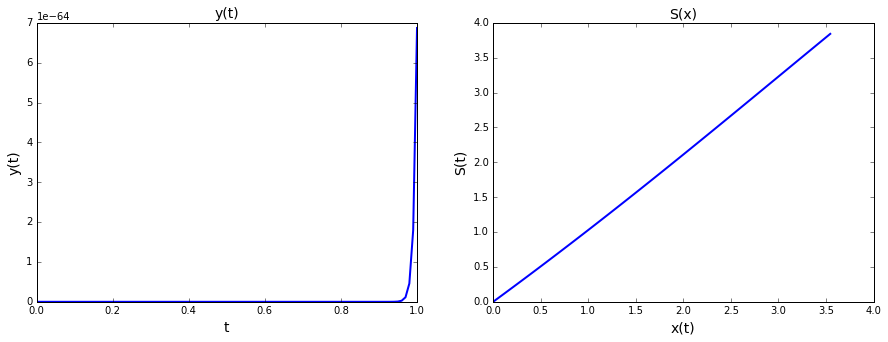

In [56]:
rho = lambda x: 6*x*(1-x)
S = lambda t: 3*t + sin(t)
z = lambda t: 4*t + cos(t)
f = F_func(expression="beta*(S-x)**100", beta=0.00000001, z_func=z, s_func=S)
y_0 = 0
x_0 = 0
T = 1
is_automatic=False
log = solver_logged(is_automatic=False, rho=rho, z=z, S=S, f=f, y_0=y_0, x_0=x_0, T=T)
log

['Manual mode started',
 'C1_score = 0.500000000305',
 'C2_score = 0.0773034658895',
 '\xd0\xa4(beta) = 1.2730346592']

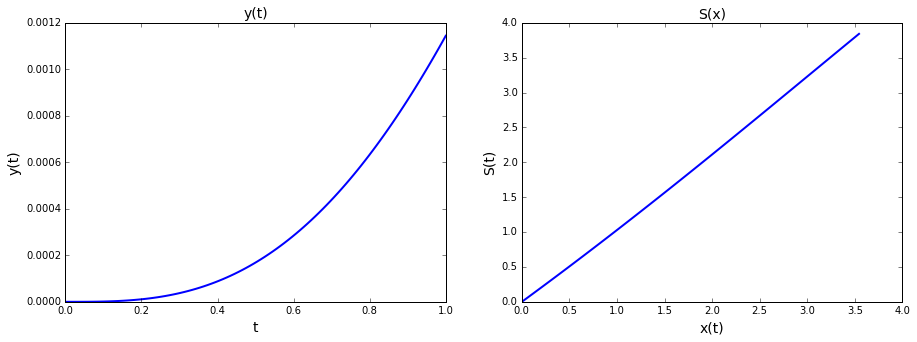

In [58]:
rho = lambda x: 6*x*(1-x)
S = lambda t: 3*t + sin(t)
z = lambda t: 4*t + cos(t)
f = F_func(expression="beta*(S-x)", beta=0.01, z_func=z, s_func=S)
y_0 = 0
x_0 = 0
T = 1
log = solver_logged(is_automatic=False, rho=rho, z=z, f=f, S=S, y_0=y_0, x_0=x_0, T=T)
log

## Описание используемых программных средств (какой язык программирования и какие библиотеки использовались)

- python
- Django, HTML
- jupyter notebook

Библиотеки:

- numpy
- pandas
- matplotlib
- math (sin, cos, sqrt, log, e)


# Диаграмма решения системы ОДУ

https://www.draw.io/#G0B_0-z0UpyvbgTzQzQ2otN2w2NEU

/home/michal/Projects/ads_chm/ЧМ_Проект_Diagram.html 